In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense,MaxPool2D,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop

In [2]:
import os
mainfoldername = 'Gesture Image Data'
mainfolder = os.listdir(mainfoldername)

In [3]:
images = []
label_list = []
for folder in mainfolder:
    for File in os.listdir(mainfoldername + '\\' + folder):
        Filepath = mainfoldername + '\\' + str(folder) + '\\'+str(File)
        print(Filepath)
        img = cv2.imread(Filepath)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img,(50,50))
        images.append(img)
    label_list.append(folder)

Gesture Image Data\0\1.jpg
Gesture Image Data\0\10.jpg
Gesture Image Data\0\100.jpg
Gesture Image Data\0\1000.jpg
Gesture Image Data\0\1001.jpg
Gesture Image Data\0\1002.jpg
Gesture Image Data\0\1003.jpg
Gesture Image Data\0\1004.jpg
Gesture Image Data\0\1005.jpg
Gesture Image Data\0\1006.jpg
Gesture Image Data\0\1007.jpg
Gesture Image Data\0\1008.jpg
Gesture Image Data\0\1009.jpg
Gesture Image Data\0\101.jpg
Gesture Image Data\0\1010.jpg
Gesture Image Data\0\1011.jpg
Gesture Image Data\0\1012.jpg
Gesture Image Data\0\1013.jpg
Gesture Image Data\0\1014.jpg
Gesture Image Data\0\1015.jpg
Gesture Image Data\0\1016.jpg
Gesture Image Data\0\1017.jpg
Gesture Image Data\0\1018.jpg
Gesture Image Data\0\1019.jpg
Gesture Image Data\0\102.jpg
Gesture Image Data\0\1020.jpg
Gesture Image Data\0\1021.jpg
Gesture Image Data\0\1022.jpg
Gesture Image Data\0\1023.jpg
Gesture Image Data\0\1024.jpg
Gesture Image Data\0\1025.jpg
Gesture Image Data\0\1026.jpg
Gesture Image Data\0\1027.jpg
Gesture Image Data

In [4]:
print(images[0:11])
print(label_list)

[array([[[128,  91,  62],
        [122,  85,  58],
        [129,  92,  66],
        ...,
        [133, 112,  93],
        [132, 114,  94],
        [132, 115,  95]],

       [[129,  92,  65],
        [125,  90,  62],
        [128,  90,  67],
        ...,
        [133, 112,  93],
        [132, 113,  96],
        [132, 115,  97]],

       [[125,  89,  63],
        [124,  90,  63],
        [125,  89,  65],
        ...,
        [129, 108,  89],
        [130, 111,  97],
        [132, 112, 101]],

       ...,

       [[105,  80,  60],
        [109,  84,  62],
        [107,  82,  60],
        ...,
        [ 98,  90,  71],
        [100,  90,  78],
        [100,  90,  80]],

       [[106,  79,  58],
        [109,  84,  62],
        [108,  84,  58],
        ...,
        [ 98,  90,  71],
        [ 96,  89,  71],
        [ 97,  90,  74]],

       [[104,  77,  56],
        [109,  83,  60],
        [107,  83,  57],
        ...,
        [ 96,  88,  67],
        [ 96,  89,  71],
        [ 96,  91,  72]

In [5]:
images_f = np.array(images,dtype='float16')
images_f.shape

(55500, 50, 50, 3)

In [6]:
images_f_2 = images_f / 255

In [7]:
print(images_f_2)

[[[[0.502  0.357  0.2432]
   [0.4785 0.3333 0.2274]
   [0.506  0.3608 0.2588]
   ...
   [0.5215 0.4392 0.3647]
   [0.5176 0.447  0.3687]
   [0.5176 0.451  0.3726]]

  [[0.506  0.3608 0.255 ]
   [0.4902 0.353  0.2432]
   [0.502  0.353  0.2627]
   ...
   [0.5215 0.4392 0.3647]
   [0.5176 0.443  0.3765]
   [0.5176 0.451  0.3804]]

  [[0.4902 0.349  0.2471]
   [0.4863 0.353  0.2471]
   [0.4902 0.349  0.255 ]
   ...
   [0.506  0.4236 0.349 ]
   [0.51   0.4353 0.3804]
   [0.5176 0.4392 0.396 ]]

  ...

  [[0.4119 0.3137 0.2354]
   [0.4275 0.3293 0.2432]
   [0.4197 0.3215 0.2354]
   ...
   [0.3843 0.353  0.2783]
   [0.392  0.353  0.306 ]
   [0.392  0.353  0.3137]]

  [[0.4158 0.3098 0.2274]
   [0.4275 0.3293 0.2432]
   [0.4236 0.3293 0.2274]
   ...
   [0.3843 0.353  0.2783]
   [0.3765 0.349  0.2783]
   [0.3804 0.353  0.2903]]

  [[0.408  0.302  0.2196]
   [0.4275 0.3254 0.2354]
   [0.4197 0.3254 0.2235]
   ...
   [0.3765 0.3452 0.2627]
   [0.3765 0.349  0.2783]
   [0.3765 0.357  0.2825]]]


 

In [8]:
labels = []
for i in range(37):
    for j in range(1500):
        labels.append(i)
labels_f = np.array(labels)

In [9]:
labels_f.shape

(55500,)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,Y_train,Y_test= train_test_split(images_f_2,labels_f,test_size=0.25)

In [12]:
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def convolution_block(x, filters, kernel_size=(3, 3), padding='same', strides=(1, 1)):
    x = Conv2D(filters, kernel_size, padding=padding, strides=strides, kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x

def create_cnn_model(input_shape, n_classes):
    inputs = Input(shape=input_shape)
    
    # Using the convolution_block function
    x = convolution_block(inputs, 32)
    x = MaxPool2D(pool_size=(2, 2))(x)
    x = Dropout(0.1)(x)  # Added dropout
    
    x = convolution_block(x, 64)
    x = MaxPool2D(pool_size=(2, 2))(x)
    x = Dropout(0.1)(x)  # Added dropout
    
    x = convolution_block(x, 128)
    x = MaxPool2D(pool_size=(2, 2))(x)
    x = Dropout(0.1)(x)  # Added dropout
    
    x = convolution_block(x, 256)
    x = MaxPool2D(pool_size=(2, 2))(x)
    x = Dropout(0.1)(x)  # Added dropout
    
    # Flatten and dense layers
    x = Flatten()(x)
    x = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = Dropout(0.25)(x)
    
    # Output layer
    outputs = Dense(n_classes, activation='softmax')(x)
    
    # Create model
    model = Model(inputs=inputs, outputs=outputs)
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

input_shape = (50, 50, 3)
n_classes = 37  

Model = create_cnn_model(input_shape, n_classes)
Model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 50, 50, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 50, 50, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 50, 50, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 25, 25, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 25, 25, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,52

 Total params: 540,261 (2.06 MB)

 Trainable params: 539,301 (2.06 MB)

 Non-trainable params: 960 (3.75 KB)

In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

In [14]:
file_name = "SignLanguageDetection.keras"
checkpoint = ModelCheckpoint(file_name,monitor="val_loss",verbose=1,save_best_only=True,save_weights_only=False,mode="auto",save_freq="epoch")
Early_stop = EarlyStopping(patience=60,monitor="val_loss",restore_best_weights=True)
callback_list = [checkpoint,Early_stop]

In [15]:
from tensorflow.keras.utils import to_categorical
num_classes = 37  
Y_train = to_categorical(Y_train, num_classes)

# Compile the model
metrics = ["accuracy"]
Model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics)

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.3  # 70% training, 30% validation
)
History = Model.fit(
    datagen.flow(X_train, Y_train, batch_size=32, subset='training'),
    validation_data=datagen.flow(X_train, Y_train, batch_size=32, subset='validation'),
    epochs=120,
    callbacks=callback_list
)


Epoch 1/120


c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


911/911 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.1616 - loss: 4.5819
Epoch 1: val_loss improved from inf to 1.60238, saving model to SignLanguageDetection.keras
911/911 ━━━━━━━━━━━━━━━━━━━━ 130s 136ms/step - accuracy: 0.1617 - loss: 4.5804 - val_accuracy: 0.6333 - val_loss: 1.6024
Epoch 2/120
911/911 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.4853 - loss: 1.8876
Epoch 2: val_loss did not improve from 1.60238
911/911 ━━━━━━━━━━━━━━━━━━━━ 120s 132ms/step - accuracy: 0.4853 - loss: 1.8875 - val_accuracy: 0.6076 - val_loss: 1.6207
Epoch 3/120
911/911 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.5592 - loss: 1.7004
Epoch 3: val_loss improved from 1.60238 to 1.48624, saving model to SignLanguageDetection.keras
911/911 ━━━━━━━━━━━━━━━━━━━━ 116s 127ms/step - accuracy: 0.5593 - loss: 1.7004 - val_accuracy: 0.6460 - val_loss: 1.4862
Epoch 4/120
911/911 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.6111 - loss: 1.5668
Epoch 4: val_loss did not improve from 1.48624
911/911 ━━━

In [16]:
num_classes = 37
Y_test = to_categorical(Y_test, num_classes)

In [17]:
Model.evaluate(X_test,Y_test)

434/434 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9865 - loss: 0.3948


[0.39400961995124817, 0.9870270490646362]

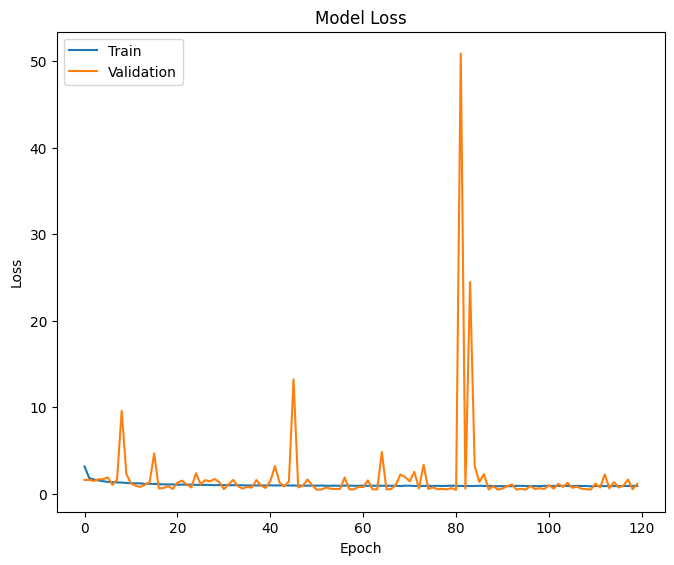

In [18]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

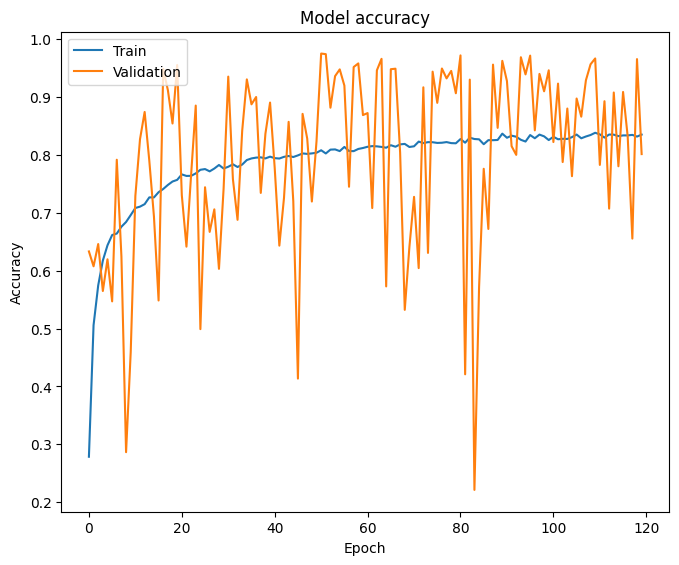

In [19]:
plt.plot(History.history["accuracy"], label="Train")
plt.plot(History.history["val_accuracy"], label="Validation")
plt.title("Model accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='upper left')
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0, hspace=0.25, wspace=0.35)
plt.show()

In [20]:
from sklearn.metrics import confusion_matrix,classification_report

Y_test_labels = np.argmax(Y_test, axis=1)
Y_pred = Model.predict(X_test)
Y_pred = np.argmax(Y_pred,axis=1)
report = classification_report(Y_test_labels,Y_pred)
print(report)


434/434 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       375
           1       1.00      1.00      1.00       351
           2       1.00      1.00      1.00       368
           3       1.00      1.00      1.00       409
           4       0.95      0.67      0.79       390
           5       1.00      1.00      1.00       374
           6       1.00      0.96      0.98       371
           7       1.00      1.00      1.00       377
           8       1.00      1.00      1.00       356
           9       0.76      1.00      0.86       398
          10       1.00      1.00      1.00       349
          11       1.00      1.00      1.00       369
          12       1.00      1.00      1.00       378
          13       0.99      0.96      0.98       382
          14       1.00      1.00      1.00       379
          15       1.00      1.00      1.00       351
          16       1.00      0.99     

[[375   0   0 ...   0   0   0]
 [  0 351   0 ...   0   0   0]
 [  0   0 368 ...   0   0   0]
 ...
 [  0   0   0 ... 390   0   0]
 [  0   0   0 ...   0 355   0]
 [  0   0   0 ...   0   0 378]]


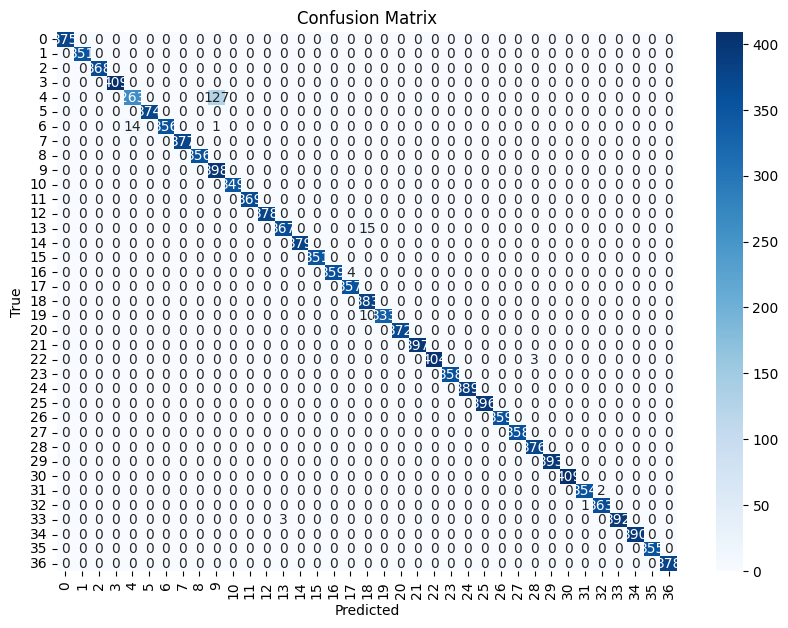

In [21]:
import seaborn as sns
cm = confusion_matrix(Y_test_labels,Y_pred)
print(cm)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [28]:
Model.save_weights(filepath="Model_Weights.weights.h5")